<a href="https://colab.research.google.com/github/yashdabhade1/Spiking-Neural-Networks/blob/main/Caltech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nengo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 12.0 MB/s eta 0:00:00


In [3]:
pip install nengo_dl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nengo_dl: filename=nengo_dl-3.6.0-py3-none-any.whl size=204207 sha256=1776672c7d11f13a2155a5f31e7b94db82f6d3d1199bde5919ef3ca4fa04305f
  Stored in directory: /root/.cache/pip/wheels/99/98/1a/c238f79c953dec26b4345dc4aa1a9b7b0b250bac1018985465
Successfully built nengo_dl


In [4]:
# ! pip install --upgrade gitdb
# ! pip install nengo-dl==2.0.0
# ! pip install nengo==2.7.0

# ! pip install tensorflow==1.14
# ! pip install tensorflow-gpu==1.14

# %tensorflow_version 1.x

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

import nengo
import nengo_dl

In [5]:
import tensorflow.compat.v1 as tf

In [6]:
 %cd /content/
!git clone https://github.com/shriya999/caltech_subset.git

import pandas as pd
import os
from matplotlib import image
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

path1 = "/content/caltech_subset/airplanes/"
path2 = "/content/caltech_subset/Motorbikes/"

dataset = []
labels = []
dimen1 = 150
dimen2 = 200

for filename in os.listdir(path1):
    data = rgb2gray(image.imread(path1+filename))
    data = resize(data, (dimen1, dimen2),anti_aliasing=True)
    dataset.append(data)
    labels.append([0,1])

# for filename in os.listdir(path2):
#     data = rgb2gray(image.imread(path2+filename))
#     data = resize(data, (dimen1, dimen2),anti_aliasing=True)
#     dataset.append(data)
#     labels.append([1,0])

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.11, random_state=42, shuffle = True)

train_data = np.asarray(X_train, dtype=np.float32)
train_labels = np.asarray(y_train, dtype=np.float32)
test_data = np.asarray(X_test, dtype=np.float32)
test_labels = np.asarray(y_test, dtype=np.float32)

print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

/content
Cloning into 'caltech_subset'...
remote: Enumerating objects: 2933, done.
remote: Counting objects: 100% (2293/2293), done.
remote: Compressing objects: 100% (2292/2292), done.
remote: Total 2933 (delta 1), reused 2293 (delta 1), pack-reused 640
Receiving objects: 100% (2933/2933), 110.33 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (2920/2920), done.
(712, 150, 200) (88, 150, 200) (712, 2) (88, 2)


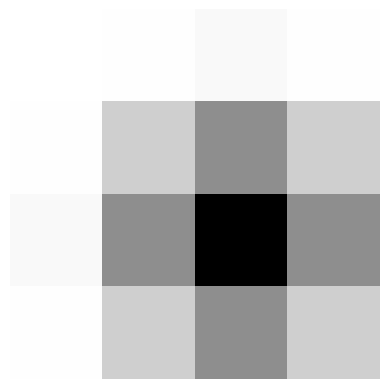

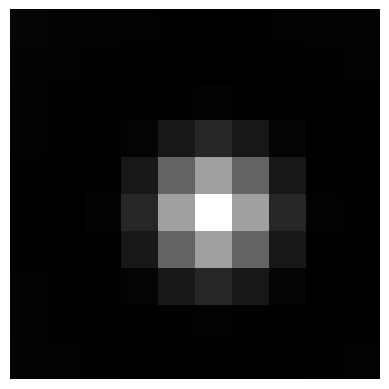

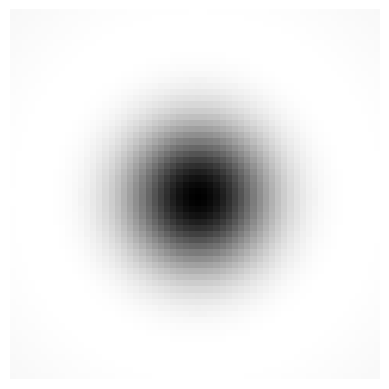

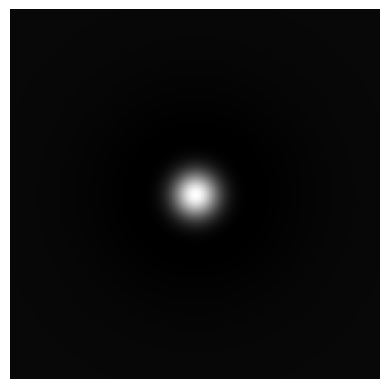

In [7]:
import numpy as np
#from tensorflow.examples.tutorials.mnist import input_data
from scipy.ndimage import correlate
%matplotlib inline 
import matplotlib.pyplot as plt

#tf.compat.v1.reset_default_graph()
tf.reset_default_graph()
tf.compat.v1.disable_eager_execution()
x_input = tf.placeholder(dtype=tf.float32, shape=[None, train_data.shape[1]*train_data.shape[2]], name='x_input')
y_input = tf.placeholder(dtype=tf.float32, shape=[None, train_labels.shape[1]], name='actual_label')

x_in = x_input
y_in = y_input

def dog_on(n,v,p):

  nr = np.floor(n/2) # half the size
  t = p * v # std deviation of surround (s2)
  
  x,y = np.mgrid[-nr:nr,-nr:nr]
  
  H  = 10*(1/(2 * np.pi * (v**2) )) * np.exp(-( (x**2) + (y**2) )/( 2 * (v**2) ))         # gaussian for center
  K  = 10*(1/(2 * np.pi * (t**2) )) * np.exp(-( (x**2) + (y**2) )/( 2 * (t**2) ))         # gaussian for surround
  
  s1 = np.sum( np.sum(H) )
  s2 = np.sum( np.sum(K) )
  
  D = ((s2 * H) - (s1 * K))
  return D

off_midget = -(dog_on(5,0.8,6.7))     # midget off center
on_midget = dog_on(11,1.04,6.7)    # midget on center
off_parasol = -(dog_on(61,8,4.8))     # parasol off center
on_parasol = dog_on(243,10.4,4.8)  # parasol on center


plt.figure()
plt.imshow( off_midget ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( on_midget ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( off_parasol ,cmap="gray")
plt.axis('off')

plt.figure()
plt.imshow( on_parasol ,cmap="gray")
plt.axis('off')


def DoG_conv(image):

  first_img = np.reshape( image, (28,28))
  on_conv = correlate(first_img, on_filt, mode='constant')
  off_conv = correlate( first_img, off_filt, mode='constant')

  final_img = np.zeros( (first_img.shape[0], first_img.shape[1]), dtype = np.float32 )
  for i in range(first_img.shape[0]):
    for j in range(first_img.shape[1]):
      final_img[i][j] = np.maximum( on_conv[i][j], off_conv[i][j] )
  
  return np.reshape(final_img,(784,))

FILTERING WITH ALL FOUR DoGS

In [8]:
train_set = train_data[:,:,:]
test_set = test_data[:,:,:]

# midget cells

moff_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = correlate(i, off_midget, mode='constant')
  moff_train.append( img )
  
mon_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = correlate(i, on_midget, mode='constant')
  mon_train.append( img )

moff_test = []
print(test_set.shape)
for i in test_set:
  img = correlate(i, off_midget, mode='constant')
  moff_test.append( img )
  
mon_test = []
print(test_set.shape)
for i in test_set:
  img = correlate(i, on_midget, mode='constant')
  mon_test.append( img )

# parasol cells

poff_train = []
print(train_set.shape)
modulus = train_set.shape[0]
for i in train_set:
  img = correlate(i, off_parasol, mode='constant')
  poff_train.append( img )

poff_test = []
print(test_set.shape)
for i in test_set:
  img = correlate(i, off_parasol, mode='constant')
  poff_test.append( img )
  


(712, 150, 200)
(712, 150, 200)
(88, 150, 200)
(88, 150, 200)
(712, 150, 200)
(88, 150, 200)


In [9]:
# pon_train = []
# print(train_set.shape)
# modulus = train_set.shape[0]
# for i in train_set:
#   img = correlate(i, on_parasol, mode='constant')
#   pon_train.append( img )
  
# pon_test = []
# print(test_set.shape)
# for i in test_set:
#   img = correlate(i, on_parasol, mode='constant')
#   pon_test.append( img )

OUTPUTS WITH INDIVIDUAL FILTERS

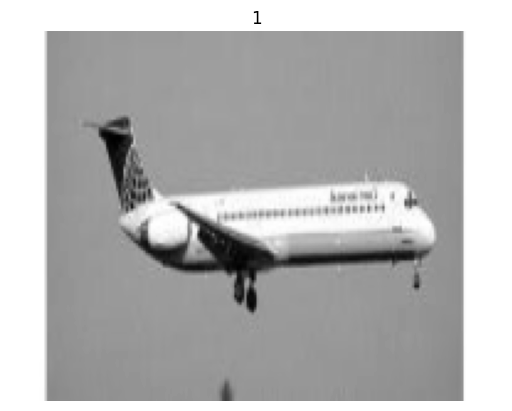

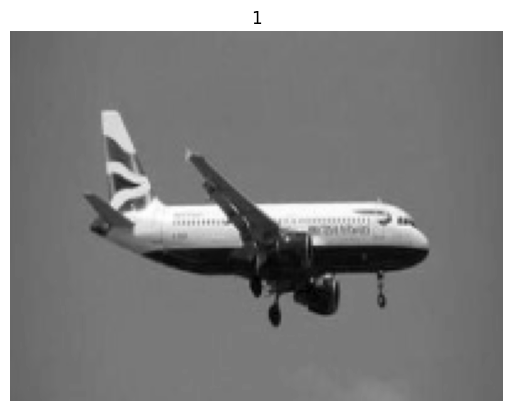

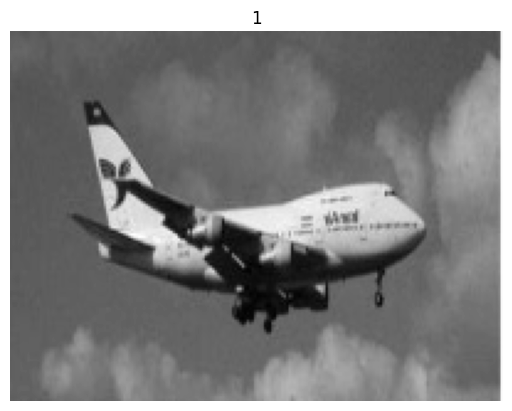

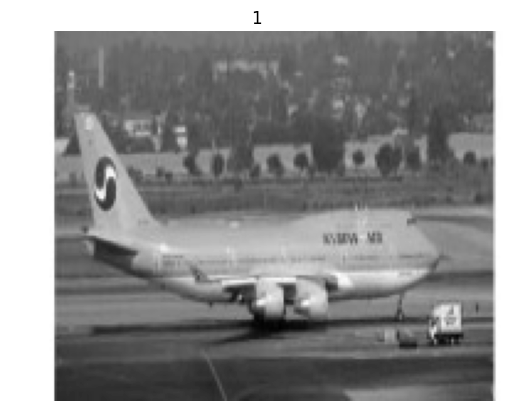

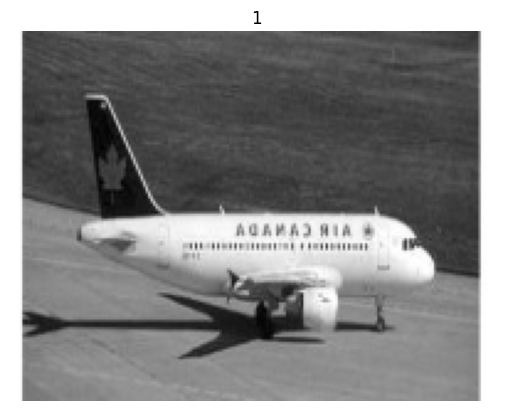

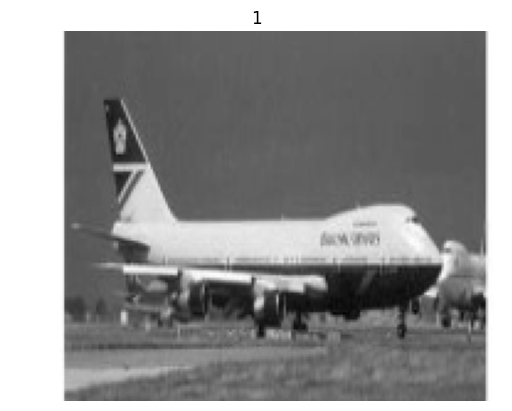

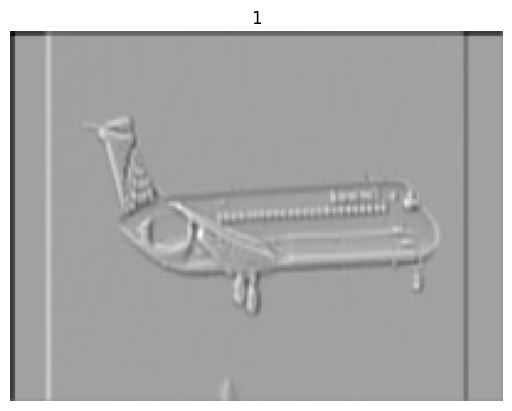

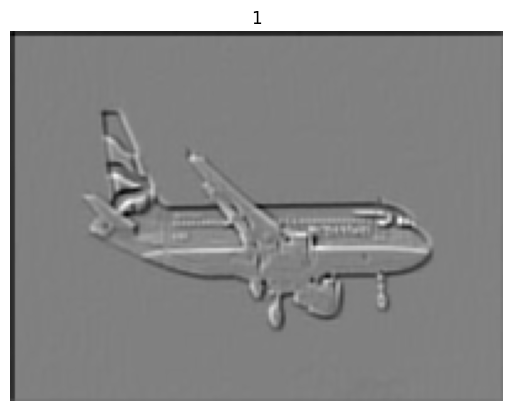

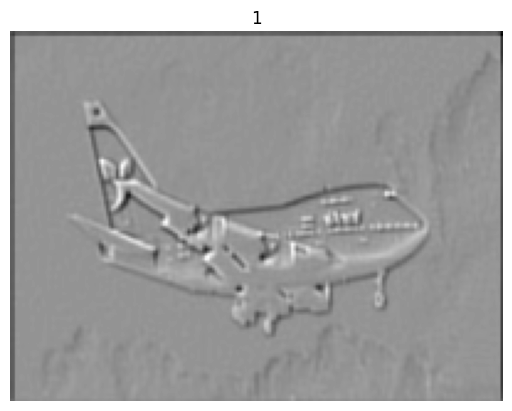

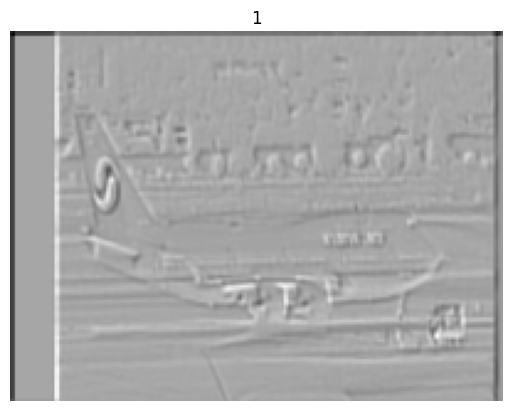

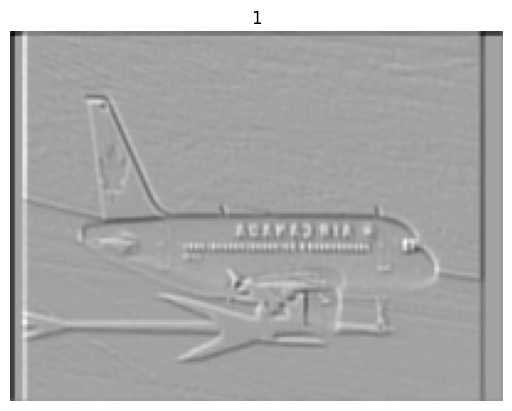

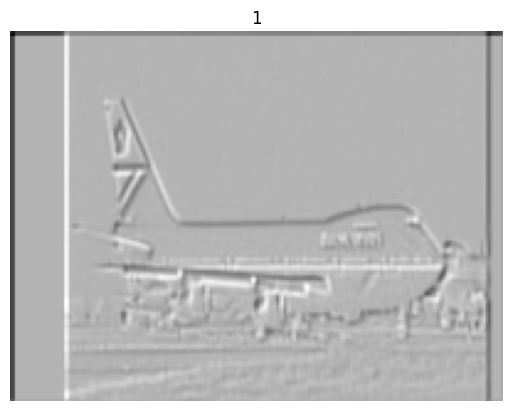

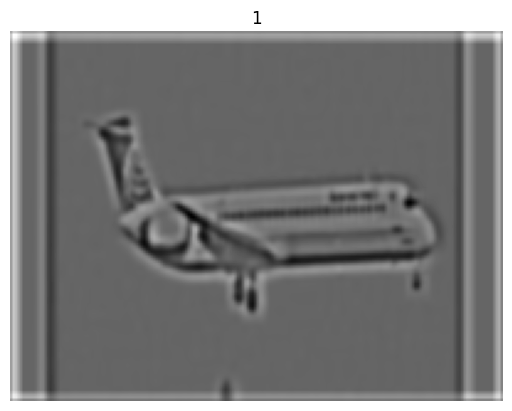

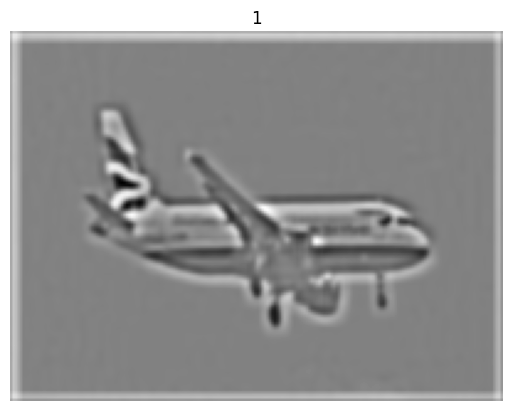

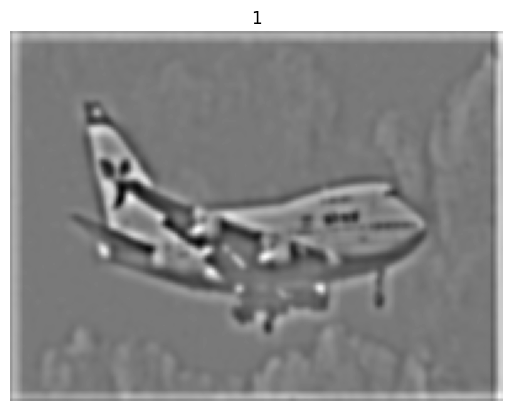

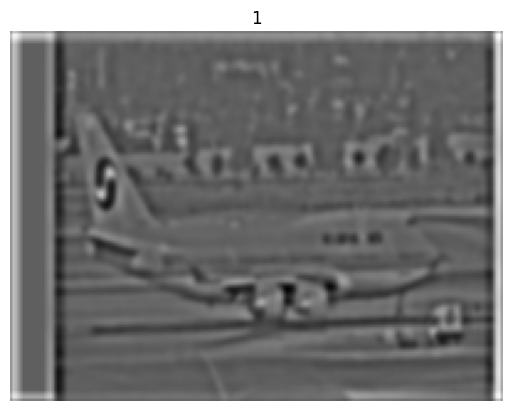

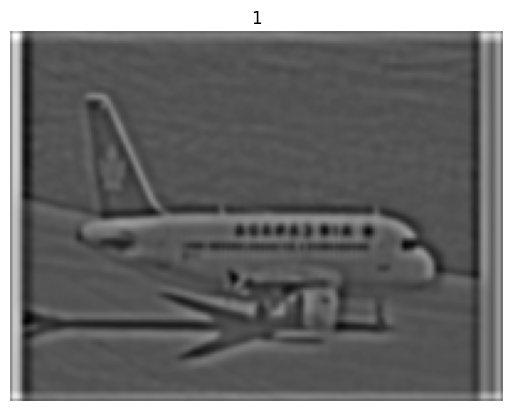

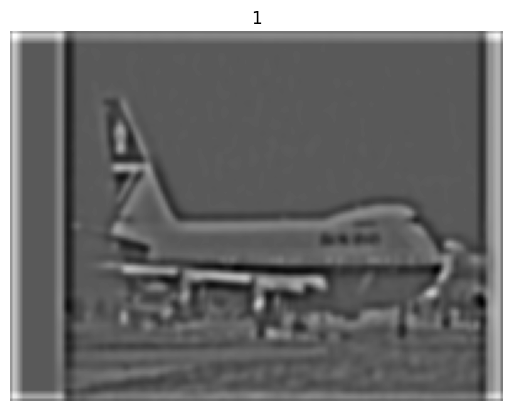

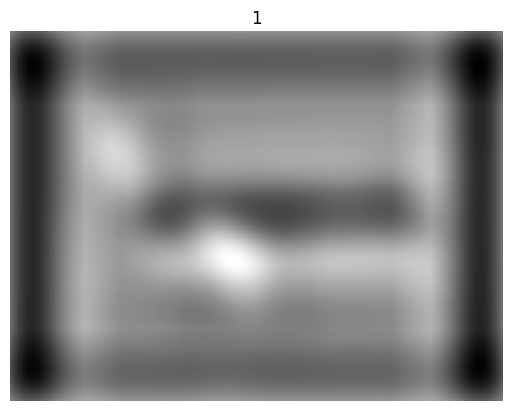

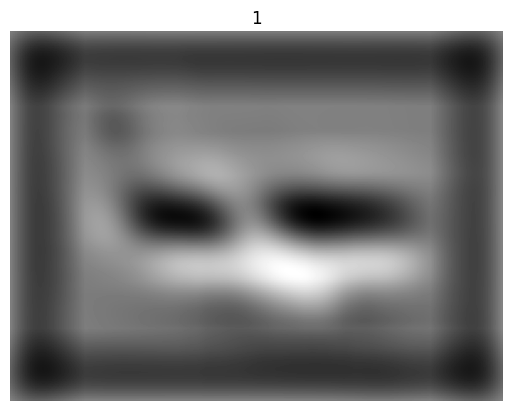

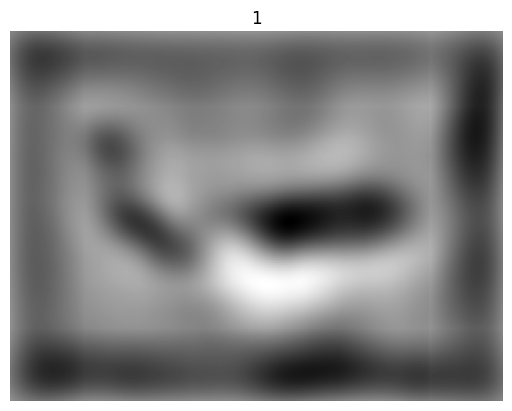

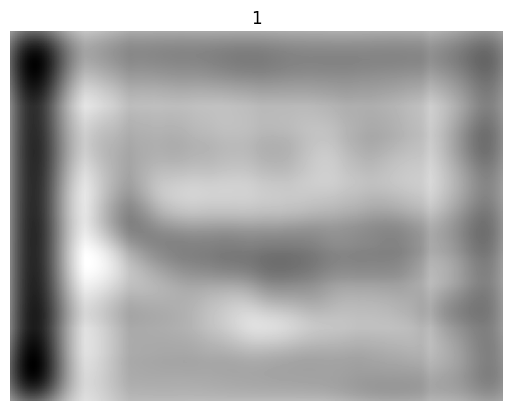

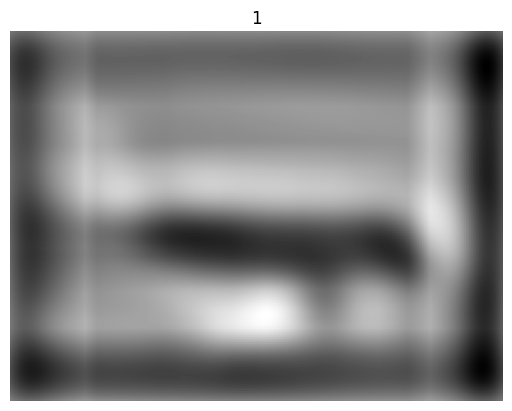

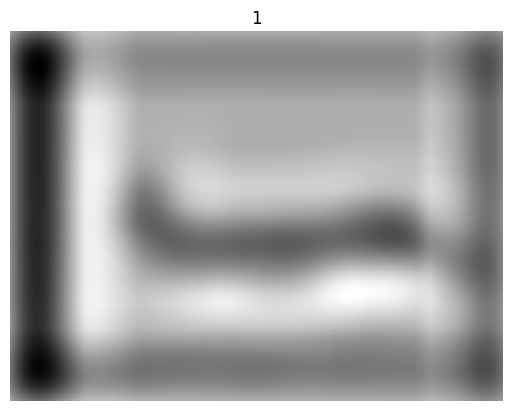

In [10]:
 disp = 6
 
 for i in range(disp):
    plt.figure()
    plt.imshow( train_data[i],cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()
 
for i in range(disp):
    plt.figure()
    plt.imshow( moff_train[i],cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()
    
for i in range(disp):
    plt.figure()
    plt.imshow( mon_train[i],cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()
    
for i in range(disp):
    plt.figure()
    plt.imshow( poff_train[i],cmap="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()
    
# for i in range(disp):
#     plt.figure()
#     plt.imshow( pon_train[i],cmap="gray")
#     plt.axis('off')
#     plt.title(str(np.argmax(train_labels[i])));
#     plt.show()

COMBINING OUTPUTS FROM DIFFERENT FILTERS

In [11]:
moff_mon_poff_pon = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( max(pon_train[k][i][j], poff_train[k][i][j]), max(mon_train[k][i][j], moff_train[k][i][j]) )
      img[i][j] = max_val
  moff_mon_poff_pon.append(img)

moff_mon_poff = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( poff_train[k][i][j], max(mon_train[k][i][j], moff_train[k][i][j]) )
      img[i][j] = max_val
  moff_mon_poff.append(img)

moff_poff = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( poff_train[k][i][j], moff_train[k][i][j] )
      img[i][j] = max_val
  moff_poff.append(img)

moff_pon = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( pon_train[k][i][j], moff_train[k][i][j] )
      img[i][j] = max_val
  moff_pon.append(img)

mon_poff = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( poff_train[k][i][j], mon_train[k][i][j] )
      img[i][j] = max_val
  mon_poff.append(img)

mon_pon = []
for k in range(len(pon_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( pon_train[k][i][j], mon_train[k][i][j] )
      img[i][j] = max_val
  mon_pon.append(img)

print(" with all four filters")

for i in range(disp):
    plt.figure()
    plt.imshow( moff_mon_poff_pon[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

print(" with moff, mon and poff filters")

for i in range(disp):
    plt.figure()
    plt.imshow( moff_mon_poff[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

print(" with moff and poff")

for i in range(disp):
    plt.figure()
    plt.imshow( moff_poff[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

print(" with moff and pon")

for i in range(disp):
    plt.figure()
    plt.imshow( moff_pon[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

print(" with mon and poff")

for i in range(disp):
    plt.figure()
    plt.imshow( mon_poff[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

print(" with mon and pon")

for i in range(disp):
    plt.figure()
    plt.imshow( mon_pon[i], cmap ="gray")
    plt.axis('off')
    plt.title(str(np.argmax(train_labels[i])));
    plt.show()

NameError: ignored

RECONSTRUCTION

In [12]:
import scipy.signal
import numpy as np

def recon_func(recon_img, kernel, coeff, x, y):
  ma = recon_img.shape[0]
  na = recon_img.shape[1]
  mb = kernel.shape[0]
  nb = kernel.shape[1]
  r1 = int(np.ceil(mb/2))
  s1 = int(np.ceil(nb/2))
  i1 = max(0, x-r1)

  for r in range(max(0,r1-x),mb):
    if(i1>=ma):
      break

    j1 = max(0,y-s1)
    for s in range(max(0,s1-y),nb):
      if(j1>=na):
        break
      recon_img[i1][j1] = recon_img[i1][j1] + kernel[r][s] * coeff
      j1 = j1+1
    i1 = i1+1
  return recon_img

def kernel_picker(cell_type):
  kernel = 0
  stride = 0

  if(cell_type == 0):
    kernel = off_midget
    stride = 2
  elif(cell_type == 1):
    kernel = on_midget
    stride = 5
  else:
    kernel = off_parasol
    stride = 30
  
  return kernel,stride

def lat_inh(ma, na, i, sorted_keys, cfs, dict1, dict2):

  cfthr1 = np.zeros(len(sorted_keys)-i-1)
  count = 0
  temp = sorted_keys[i]
  (row1,col1) = dict1[temp]
  (kernel1,stride) = kernel_picker(dict2[temp])
  mb1 = kernel1.shape[0]
  nb1 = kernel1.shape[1]

  for ind in range(i,int(len(sorted_keys)) ):

    index = sorted_keys[ind - 1]

    (row2, col2) = dict1[index]
    (kernel2,stride2) = kernel_picker(dict2[index])
    mb2 = nb2 = kernel2.shape[0]

    psf = 0
    minrow1 = row1 - int((mb1 - 1)/2)
    maxrow1 = min(row1 + int((mb1 - 1)/2) , ma)
    mincol1 = col1 - int((nb1-1)/2)
    maxcol1 = min(col1 + int((nb1 - 1)/2), na)

    shiftrow1 = 0
    shiftcol1 = 0

    if(minrow1 < 0):
      shiftrow1 = 0 - minrow1
      minrow1 = 0
    else:
      shiftrow1 = 0

    if mincol1<0 :
      shiftcol1 = 0 - mincol1
      mincol1 = 0
    else:
      shiftcol1 = 0

    minrow2 = row2 - int((mb2 - 1)/2)
    maxrow2 = min(row2 + int((mb2 - 1)/2), ma)
    mincol2 = col2 - int((nb2 - 1)/2)
    maxcol2 = min(col2 + int((nb2-1)/2), na)

    if(minrow2<0):
      shiftrow2 = 0 - minrow2
      minrow2 = 0
    else:
      shiftrow2 = 0

    if(mincol2<0):
      shiftcol2 = 0 - mincol2
      mincol2 = 0
    else:
      shiftcol2 = 0

    rowloopstart = max (minrow1, minrow2)
    rowloopend = min (maxrow1, maxrow2)
    colloopstart = max (mincol1, mincol2)
    colloopend = min (maxcol1, maxcol2)    

    for r in range(rowloopstart, rowloopend+1):
      for c in range(colloopstart, colloopend+1):
          r1 = r - minrow1 + shiftrow1
          c1 = c - mincol1 + shiftcol1
          r2 = r - minrow2 + shiftrow2
          c2 = c - mincol2 + shiftcol2

          # print(r1,c1,r2,c2)
          # print(kernel.shape[0], kernel.shape[1], kernel2.shape[0], kernel2.shape[1])	 

          psf += kernel1[r1][c1] * kernel2[r2][c2]
    cfthr1[count - 1] = cfs[sorted_keys[ind - 1]] - (cfs[sorted_keys[i]] * psf)
    count = count+1
  return cfthr1

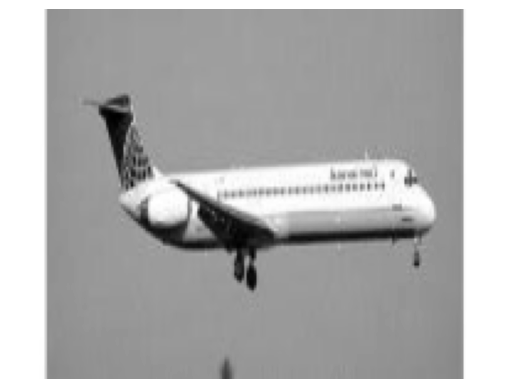

90000


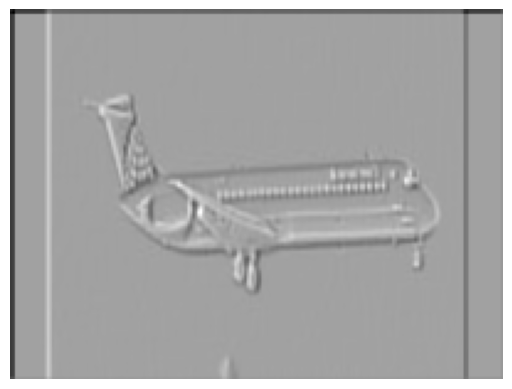

<ipython-input-12-be4fc703ad77>:114: RuntimeWarning: overflow encountered in double_scalars
  cfthr1[count - 1] = cfs[sorted_keys[ind - 1]] - (cfs[sorted_keys[i]] * psf)
<ipython-input-12-be4fc703ad77>:114: RuntimeWarning: invalid value encountered in double_scalars
  cfthr1[count - 1] = cfs[sorted_keys[ind - 1]] - (cfs[sorted_keys[i]] * psf)


In [ ]:
for k in range(int(disp)):

  plt.figure()
  plt.imshow( train_data[k], cmap ="gray")
  plt.axis('off')
  plt.show()
  
  lencfs = 0
  cfs = dict()
  dict1 = dict()        # storing the mapping from pixel values to location (i,j)
  dict2 = dict()         # storing the mapping from pixel values to type of filter 0:moff, 1:mon, 2:poff, 3:pon

  for i in range(moff_train[k].shape[0]):
    for j in range(moff_train[k].shape[1]):
      cfs.update( {lencfs : moff_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 0} )
      lencfs = lencfs + 1

  for i in range(mon_train[k].shape[0]):
    for j in range(mon_train[k].shape[1]):
      cfs.update( {lencfs : mon_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 1} )
      lencfs = lencfs + 1

  for i in range(poff_train[k].shape[0]):
    for j in range(poff_train[k].shape[1]):
      cfs.update( {lencfs : poff_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 2} )
      lencfs = lencfs + 1

  items = sorted(cfs.items(), key=lambda s: s[1], reverse=True)
  
  sorted_keys = list(cfs.keys())
  ro_image = np.zeros_like(moff_train[k]) # the rank ordered image
  print(len(sorted_keys))

  for i in range(int(len(sorted_keys)/3)):   # plotting the rank ordered image
    (x,y) = dict1[sorted_keys[i]]
    ro_image[x][y] = cfs[sorted_keys[i]]

  plt.figure()
  plt.imshow( ro_image, cmap ="gray")
  plt.axis('off')
  plt.show()

  for i in range(0,len(sorted_keys)-2):            # correcting the ro image with lateral inhibition
    cfthr1 = lat_inh( moff_train[k].shape[0], moff_train[k].shape[1], i, sorted_keys, cfs, dict1, dict2 )
    cfthr1 = sorted(cfthr1, reverse=True)
    for j in range(i+1,int(len(sorted_keys)) ):
      key = sorted_keys[j]
      cfs[key] = cfthr1[j-(i+1)]
 
  for i in range(int(len(sorted_keys)/3)):   # plotting the corrected rank ordered image
    (x,y) = dict1[sorted_keys[i]]
    ro_image[x][y] = cfs[sorted_keys[i]]

  plt.figure()
  plt.imshow( ro_image, cmap ="gray")
  plt.axis('off')
  plt.show()

  recon_image = np.zeros_like(moff_train[k]) # the reconstructed image
  index = 0
  for i in range(int(len(sorted_keys))):
    (x,y) = dict1[sorted_keys[i]]
    cell_type = dict2[sorted_keys[i]]
    (kernel,stride) = kernel_picker(cell_type)

    recon_image = recon_func(recon_image, kernel, cfs[sorted_keys[i]], x, y)

    if(index%9000 == 0):
      print("this is index number: ",index)
      plt.figure()
      plt.imshow( recon_image, cmap ="gray")
      plt.axis('off')
      plt.show()
    index+=1

CHOOSING THE OPTIMAL COMBINATION

In [ ]:
combined_train = []
combined_test = []

for k in range(len(poff_train)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):

      if(moff_train[k][i][j] > mon_train[k][i][j]):
        max_val = moff_train[k][i][j]
      else:
        max_val = mon_train[k][i][j]
      if(poff_train[k][i][j] > max_val):
        max_val = poff_train[k][i][j]

      max_val = max( poff_train[k][i][j], max(moff_train[k][i][j], mon_train[k][i][j]) )
      img[i][j] = max_val
  combined_train.append(np.reshape(img,(30000,)))

for k in range(len(poff_test)):
  img = np.zeros((dimen1,dimen2))
  for i in range(dimen1):
    for j in range(dimen2):
      max_val = max( poff_test[k][i][j], max(moff_test[k][i][j], mon_test[k][i][j]) )
      img[i][j] = max_val
  combined_test.append(np.reshape(img,(30000,)))

In [ ]:
ro_train = []
ro_test = []

for k in range(len(poff_train)):  
  lencfs = 0
  cfs = dict()
  dict1 = dict()        # storing the mapping from pixel values to location (i,j)
  dict2 = dict()         # storing the mapping from pixel values to type of filter 0:moff, 1:mon, 2:poff, 3:pon

  for i in range(moff_train[k].shape[0]):
    for j in range(moff_train[k].shape[1]):
      cfs.update( {lencfs : moff_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 0} )
      lencfs = lencfs + 1
  for i in range(mon_train[k].shape[0]):
    for j in range(mon_train[k].shape[1]):
      cfs.update( {lencfs : mon_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 1} )
      lencfs = lencfs + 1
  for i in range(poff_train[k].shape[0]):
    for j in range(poff_train[k].shape[1]):
      cfs.update( {lencfs : poff_train[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 2} )
      lencfs = lencfs + 1

  items = sorted(cfs.items(), key=lambda s: s[1], reverse=True)
  sorted_keys = list(cfs.keys())
  ro_image = np.zeros_like(moff_train[k]) # the rank ordered image
  for i in range(int(len(sorted_keys)/3)):   # plotting the rank ordered image
    (x,y) = dict1[sorted_keys[i]]
    ro_image[x][y] = cfs[sorted_keys[i]]
  ro_train.append(np.reshape(ro_image,(30000,)))

for k in range(len(poff_test)):
  lencfs = 0
  cfs = dict()
  dict1 = dict()        # storing the mapping from pixel values to location (i,j)
  dict2 = dict()         # storing the mapping from pixel values to type of filter 0:moff, 1:mon, 2:poff, 3:pon

  for i in range(moff_test[k].shape[0]):
    for j in range(moff_test[k].shape[1]):
      cfs.update( {lencfs : moff_test[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 0} )
      lencfs = lencfs + 1
  for i in range(mon_test[k].shape[0]):
    for j in range(mon_test[k].shape[1]):
      cfs.update( {lencfs : mon_test[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 1} )
      lencfs = lencfs + 1
  for i in range(poff_test[k].shape[0]):
    for j in range(poff_test[k].shape[1]):
      cfs.update( {lencfs : poff_test[k][i][j]})
      dict1.update( {lencfs : (i,j)} )
      dict2.update( {lencfs : 2} )
      lencfs = lencfs + 1

  items = sorted(cfs.items(), key=lambda s: s[1], reverse=True)
  sorted_keys = list(cfs.keys())
  ro_image = np.zeros_like(moff_train[k]) # the rank ordered image
  for i in range(int(len(sorted_keys)/3)):   
    (x,y) = dict1[sorted_keys[i]]
    ro_image[x][y] = cfs[sorted_keys[i]]
  ro_test.append(np.reshape(ro_image,(30000,)))

LOADING THE DATA

In [ ]:
foveal_filter = off_midget       # options: off_midget, on_midget, off_parasol, on_parasol
filtered_train = []
modulus = train_data.shape[0]
for i in train_data:
  img = np.reshape(i, (150,200) )
  img = correlate(img, foveal_filter, mode='constant')
  filtered_train.append( np.reshape( img,(30000,)) )
  
filtered_test = []
for i in test_data:
  img = np.reshape(i, (150,200) )
  img = correlate(img, foveal_filter, mode='constant')
  filtered_test.append( np.reshape( img,(30000,)) )
  
train_features = np.asarray(filtered_train, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.float32)
test_features = np.asarray(filtered_test, dtype=np.float32)
test_labels = np.asarray(test_labels, dtype=np.float32)
 
print(train_features.shape, test_features.shape)

THE NETWORK

In [ ]:
# lif parameters
lif_neurons = nengo.LIF(amplitude=0.01)
softlif_neurons = nengo_dl.SoftLIFRate(amplitude=0.01, sigma=0.001)
ens_params = dict(max_rates=nengo.dists.Choice([100]), intercepts=nengo.dists.Choice([0]))
n_filt = 1

def build_network(neuron_type, output_synapse=None):
  with nengo.Network() as net:
        nengo_dl.configure_settings(trainable=False)

        # the input node that will be used to feed in input images
        inp = nengo.Node([0] * 150 * 200)

        # add the first convolutional layer
        x = nengo_dl.tensor_layer(inp, tf.layers.conv2d, shape_in=(150, 200, 1), filters=8 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # add a pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(150, 200, 8), pool_size=2, strides=2)

        # add another convolutional layer
        x = nengo_dl.tensor_layer(x, tf.layers.conv2d, shape_in=(75, 100, 8), filters=16 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # add a pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(75, 100, 16), pool_size=2, strides=2)

        # another convolutional layer
        x = nengo_dl.tensor_layer(x, tf.layers.conv2d, shape_in=(37, 50, 16),filters=32 * n_filt, kernel_size=3, strides=1, padding='SAME')
        x = nengo_dl.tensor_layer(x, neuron_type, **ens_params)

        # another pooling layer
        x = nengo_dl.tensor_layer(x, tf.layers.average_pooling2d, shape_in=(37, 50, 32),pool_size=2, strides=2)

        # linear readout
        x = nengo_dl.tensor_layer(x, tf.layers.dense, units=2)
        p = nengo.Probe(x, synapse=output_synapse)

  return net, inp, p

In [ ]:
# construct the network
net, inp, out_p = build_network(softlif_neurons)

# construct the simulator
minibatch_size = 50
sim = nengo_dl.Simulator(net, minibatch_size = minibatch_size)

# add the single timestep to the training data
train_input = {inp: train_features[:, None, :], out_p: train_labels[:, None, :]}
test_input = {inp:  test_features[:minibatch_size*2, None, :], out_p: test_labels[:minibatch_size*2, None, :]}

def objective(x, y):
    return tf.nn.softmax_cross_entropy_with_logits_v2(logits=x, labels=y)
  
opt = tf.train.RMSPropOptimizer(learning_rate=0.001)

def classification_acc(outputs, targets):
    return 100 * (1 - tf.reduce_mean(tf.cast(tf.not_equal(tf.argmax(outputs[:, -1], axis=-1), tf.argmax(targets[:, -1], axis=-1)), tf.float32)))

print("accuracy before training: %.2f%%" % sim.loss(test_input, {out_p: classification_acc}))
sim.train(train_input, opt, objective={out_p: objective}, n_epochs=3)
sim.save_params("./mnist_params")
sim.close()

In [ ]:
net, inp, out_p = build_network(lif_neurons, output_synapse=0.1)
sim = nengo_dl.Simulator(net, minibatch_size=minibatch_size)
sim.load_params("./mnist_params")

n_steps = 60
test_input = {inp: np.tile(test_features[:minibatch_size*2, None, :], (1, n_steps, 1)), out_p: np.tile(test_labels[:minibatch_size*2, None, :], (1, n_steps, 1))}
print("spiking neuron accuracy: %.2f%%" % sim.loss(test_input, {out_p: classification_acc}))

In [ ]:
sim.run_steps(n_steps, data={inp: test_input[inp][:minibatch_size]})

for i in range(5):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.reshape(test_input[inp][i, 0], (150, 200)),cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(sim.trange(), sim.data[out_p][i])
    plt.legend([str(i) for i in range(2)], loc="upper left")
    plt.xlabel("time")

sim.close()